<a href="https://colab.research.google.com/github/NishithaThimmappa/Coursera_projects/blob/main/Image_Classification_with_CNN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification with CNN using Keras**

In [2]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt

if not os.path.isdir('models'):
  os.mkdir('models')

print('Tensorflow version', tf.__version__)
print('Is using GPU ?', tf.test.is_gpu_available())

Tensorflow version 2.7.0
Is using GPU ? False


In [7]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
(x_train, y_train) = get_three_classes(x_train, y_train)
(x_test, y_test) = get_three_classes(x_test, y_test)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


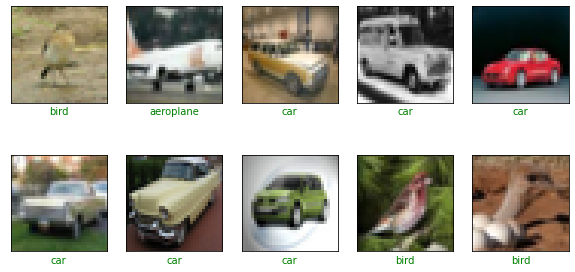

In [12]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
    plt.show()
show_random_examples(x_train, y_train, y_train)
                               

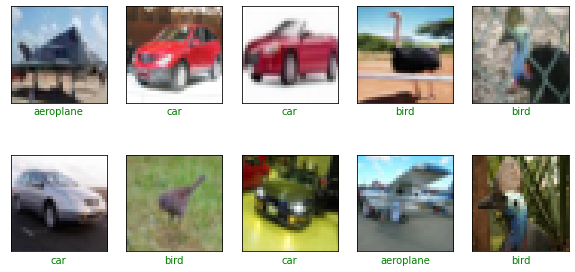

In [14]:
show_random_examples(x_test, y_test, y_test)

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation='relu',padding= 'same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation='softmax')) 
    
    model.compile(loss= 'categorical_crossentropy', optimizer  = 'adam', metrics= ['accuracy'])
    return model

model =  create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

In [21]:
history=model.fit(
    x_train/255.,
    y_train,
    validation_data=(x_test/255., y_test),
    epochs=10,
    batch_size=128,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
               tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                                  save_best_only=True, save_weights_only=False,
                                                  monitor='val_accuracy')]

)

Epoch 1/10
118/118 [==============================] - 127s 1s/step - loss: 0.9027 - accuracy: 0.6767 - val_loss: 2.3796 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 112s 954ms/step - loss: 0.5632 - accuracy: 0.7729 - val_loss: 2.2722 - val_accuracy: 0.5173
Epoch 3/10
118/118 [==============================] - 91s 768ms/step - loss: 0.4932 - accuracy: 0.8037 - val_loss: 2.0178 - val_accuracy: 0.4657
Epoch 4/10
118/118 [==============================] - 89s 757ms/step - loss: 0.4516 - accuracy: 0.8186 - val_loss: 0.9015 - val_accuracy: 0.6407
Epoch 5/10
118/118 [==============================] - 89s 750ms/step - loss: 0.4199 - accuracy: 0.8313 - val_loss: 0.7254 - val_accuracy: 0.7080
Epoch 6/10
118/118 [==============================] - 87s 738ms/step - loss: 0.3864 - accuracy: 0.8488 - val_loss: 0.5126 - val_accuracy: 0.8117
Epoch 7/10
118/118 [==============================] - 90s 766ms/step - loss: 0.3557 - accuracy: 0.8622 - val_loss: 0.4017 - val_acc

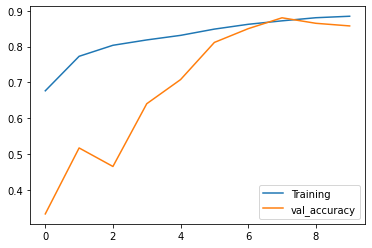

In [22]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

plt.plot(range(len(accuracy)), accuracy, label='Training')
plt.plot(range(len(accuracy)), val_accuracy, label='val_accuracy')
plt.legend()
plt.show()

In [25]:
model = tf.keras.models.load_model('models/model_0.880.h5')
pred = model.predict(x_test/255.)

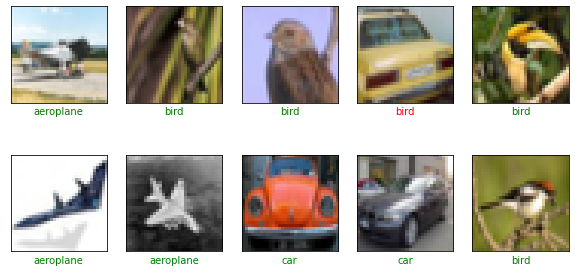

In [26]:
show_random_examples(x_test, y_test, pred)